# Monthly Data
- [호주 당뇨병 치료약(anti-diabetic) 월별 Sales 데이터 사용 에정](https://raw.githubusercontent.com/selva86/datasets/master/a10.csv)
- 모든 회사에 있는 월별 매출, 가입자, 등 실적 데이터에 활용

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

- 데이터 불러오기 plottig
- 계절요인 분리, Seasonl, residual을 포함하는 테이블 생성,
- insight 도출
    1. 월평균 성장률
    2. Seasonal 요소 분석
    3. residual 증감 여부

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", parse_dates=['date'], index_col='date')
df.head()


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


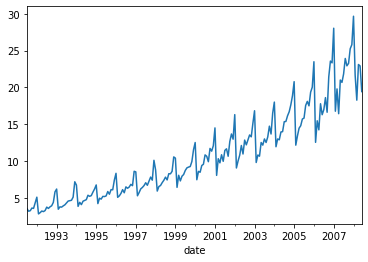

In [16]:
df.value.plot()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [19]:
# 데이터 필터링
df = df[df.index>'1999-12-31']

In [35]:
# 분리 가능
result = seasonal_decompose(df, model='additive', two_sided=False)
result.trend

date
2000-01-01          NaN
2000-02-01          NaN
2000-03-01          NaN
2000-04-01          NaN
2000-05-01          NaN
                ...    
2008-02-01    22.482596
2008-03-01    22.622704
2008-04-01    22.837394
2008-05-01    23.195400
2008-06-01    23.223005
Name: trend, Length: 102, dtype: float64

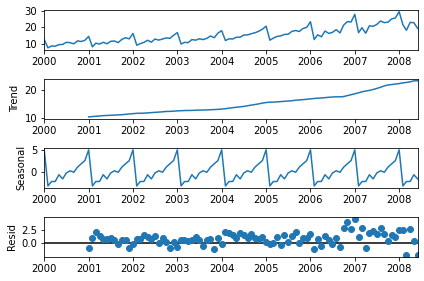

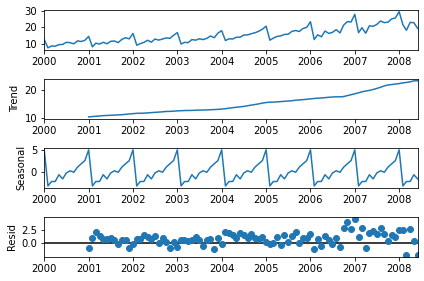

In [25]:
result.plot() # 최소 12개월은 되야 분석할 수 있어서 공백값이 존재, two_sided 옵션으로 6개월된 데이터도 가져옴

In [29]:
df_re = pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)


In [37]:
df_re.columns = ['obs', 'trend', 'seasonal', 'resId']
df_re.dropna(inplace=True)

In [39]:
df_re['year'] = df_re.index.year

In [40]:
df_re.head()


,obs,trend,seasonal,resId,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001


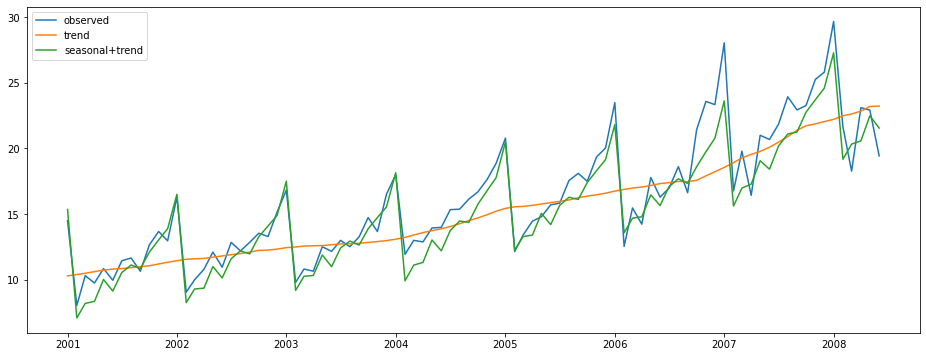

In [45]:
plt.figure(figsize=(16, 6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal + df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()
# 2006년 2007년에는 ordinary한 cycle에서 벗어나는 경향이 있다. (residual 크다.)

In [50]:
# trend
df_re.trend.pct_change() # trend 증감률 확인가능

date
2001-01-01         NaN
2001-02-01    0.010439
2001-03-01    0.009272
2001-04-01    0.011915
2001-05-01    0.010762
                ...   
2008-02-01    0.012226
2008-03-01    0.006232
2008-04-01    0.009490
2008-05-01    0.015676
2008-06-01    0.001190
Name: trend, Length: 90, dtype: float64

In [52]:

def get_date(date):
    return (str(date.year) + '-' + str(date.month))
get_date(df_re.index[0])

'2001-1'

[Text(0, 0, '2001-1'),
 Text(0, 0, '2001-2'),
 Text(0, 0, '2001-3'),
 Text(0, 0, '2001-4'),
 Text(0, 0, '2001-5'),
 Text(0, 0, '2001-6'),
 Text(0, 0, '2001-7'),
 Text(0, 0, '2001-8'),
 Text(0, 0, '2001-9'),
 Text(0, 0, '2001-10'),
 Text(0, 0, '2001-11'),
 Text(0, 0, '2001-12'),
 Text(0, 0, '2002-1'),
 Text(0, 0, '2002-2'),
 Text(0, 0, '2002-3'),
 Text(0, 0, '2002-4'),
 Text(0, 0, '2002-5'),
 Text(0, 0, '2002-6'),
 Text(0, 0, '2002-7'),
 Text(0, 0, '2002-8'),
 Text(0, 0, '2002-9'),
 Text(0, 0, '2002-10'),
 Text(0, 0, '2002-11'),
 Text(0, 0, '2002-12'),
 Text(0, 0, '2003-1'),
 Text(0, 0, '2003-2'),
 Text(0, 0, '2003-3'),
 Text(0, 0, '2003-4'),
 Text(0, 0, '2003-5'),
 Text(0, 0, '2003-6'),
 Text(0, 0, '2003-7'),
 Text(0, 0, '2003-8'),
 Text(0, 0, '2003-9'),
 Text(0, 0, '2003-10'),
 Text(0, 0, '2003-11'),
 Text(0, 0, '2003-12'),
 Text(0, 0, '2004-1'),
 Text(0, 0, '2004-2'),
 Text(0, 0, '2004-3'),
 Text(0, 0, '2004-4'),
 Text(0, 0, '2004-5'),
 Text(0, 0, '2004-6'),
 Text(0, 0, '2004-7'),
 T

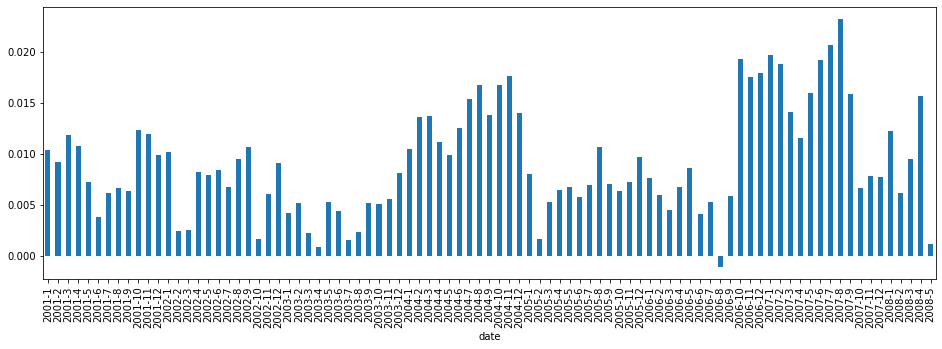

In [61]:
ax = df_re.trend.pct_change().dropna().plot(kind='bar', figsize=(16, 5))
ax.set_xticklabels(list(map(lambda x: get_date(x)
, df_re.index)))

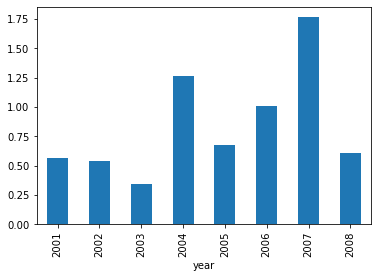

In [58]:
# residual: unexpected 값들이다.
df_re.groupby('year')['resId'].mean().plot(kind='bar')